## 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠順利訓練!


最後一天的作業請閱讀這篇非常詳盡的[文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練　CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以[參考](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet)

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from keras.datasets import cifar10
from resnet_builder import resnet
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras_lookahead import Lookahead

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
# 讀取資料集並作前處理
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [16]:
model = resnet(input_shape=(32,32,3))

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 32, 32, 16)   448         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_85 (BatchNo (None, 32, 32, 16)   64          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_85 (Activation)      (None, 32, 32, 16)   0           batch_normalization_85[0][0]     
____________________________________________________________________________________________

In [17]:
batch_size = 512
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

data_generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

history = model.fit_generator(data_generator.flow(x_train, y_train, batch_size),
                    validation_data=(x_test, y_test), 
                    steps_per_epoch=len(x_train) // batch_size, 
                    epochs=epochs, 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=.0001)])

Epoch 1/50
97/97 [==============================] - 52s 534ms/step - loss: 2.8420 - acc: 0.1366 - val_loss: 2.7052 - val_acc: 0.1807
Epoch 2/50
97/97 [==============================] - 42s 433ms/step - loss: 2.7100 - acc: 0.1409 - val_loss: 2.3999 - val_acc: 0.2269
Epoch 3/50
97/97 [==============================] - 42s 428ms/step - loss: 2.6078 - acc: 0.1471 - val_loss: 2.2645 - val_acc: 0.2915
Epoch 4/50
97/97 [==============================] - 42s 430ms/step - loss: 2.5336 - acc: 0.1470 - val_loss: 2.2171 - val_acc: 0.2406
Epoch 5/50
97/97 [==============================] - 42s 428ms/step - loss: 2.4811 - acc: 0.1483 - val_loss: 2.1191 - val_acc: 0.2701
Epoch 6/50
97/97 [==============================] - 41s 425ms/step - loss: 2.4382 - acc: 0.1488 - val_loss: 1.9870 - val_acc: 0.3319
Epoch 7/50
97/97 [==============================] - 42s 431ms/step - loss: 2.4081 - acc: 0.1503 - val_loss: 1.9618 - val_acc: 0.3309
Epoch 8/50
97/97 [==============================] - 42s 432ms/step - 

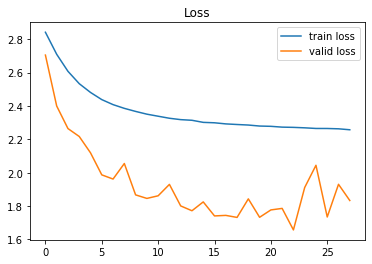

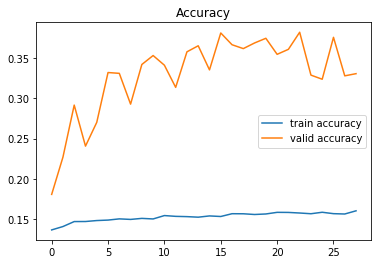

In [19]:
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()